In [1]:
# import required packages and read data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = r"C:\Users\user\OneDrive\NareshIT\DataScience\EDA\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


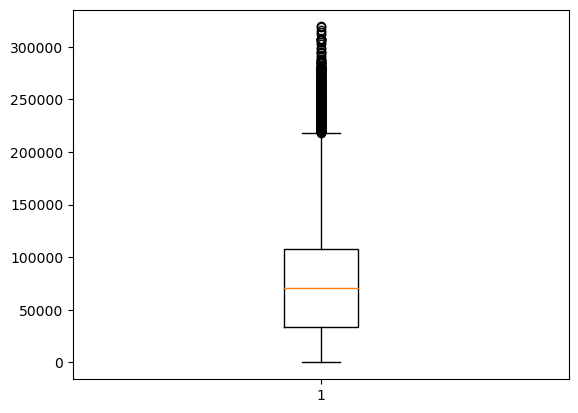

In [3]:
plt.boxplot(visa_df['prevailing_wage'], )
plt.show()
# Orange line : medain value = 50p data
# Block dot are outliers
# proce find Outliers
# Step-1,  Q1 , Q2  Q3
# step 2 IQR =  Q3-Q1

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_2348\3943089316.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\user\AppData\Local\Temp\ipykernel_2348\3943089316.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,3)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **

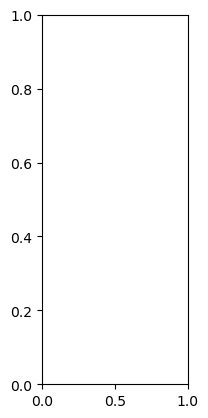

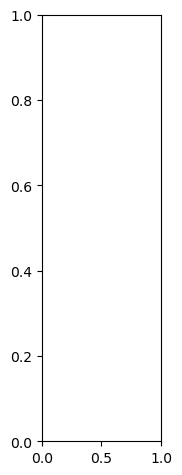

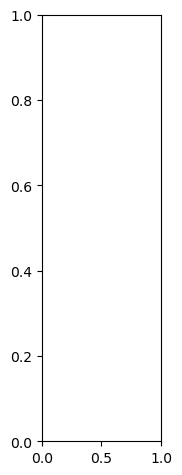

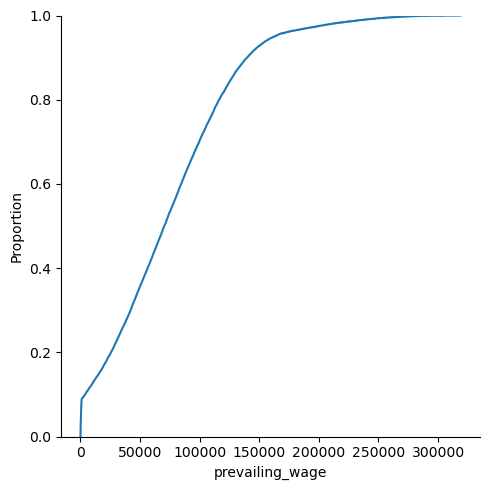

In [2]:
plt.subplot(1,3,1)
sns.displot(visa_df['prevailing_wage'])
plt.subplot(1,3,2)
sns.displot(visa_df['prevailing_wage'], kde=True)
plt.subplot(1,3,3)
sns.displot(visa_df['prevailing_wage'], kind='ecdf')

In [32]:
num_cols=visa_df.select_dtypes(exclude='object').columns
for i in num_cols:
    q1 = np.quantile(visa_df[i], 0.25)
    q2 = np.quantile(visa_df[i], 0.50)
    q3 = np.quantile(visa_df[i], 0.75)
    iqr = q3-q1
    ub = q3+1.5*iqr
    lb = q1-1.5*iqr
    con1 = visa_df[i]>ub
    con2 = visa_df[i]<lb 
    con11 = visa_df[i]<ub
    con22 = visa_df[i]>lb 
    out_lier = visa_df[con1|con2]
    non_out_lier = visa_df[con11&con22]
    print(len(non_out_lier))

23924
22220
25053


In [7]:
i = 'prevailing_wage'
q1 = np.quantile(visa_df[i], 0.25)
q2 = np.quantile(visa_df[i], 0.50)
q3 = np.quantile(visa_df[i], 0.75)
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr
con1 = visa_df[i]>ub
con2 = visa_df[i]<lb 
con11 = visa_df[i]<ub
con22 = visa_df[i]>lb 
out_lier = visa_df[con1|con2]
non_out_lier = visa_df[con11&con22]

In [4]:
def outlies(col):
    q1 = np.quantile(visa_df[col], 0.25)
    q2 = np.quantile(visa_df[col], 0.50)
    q3 = np.quantile(visa_df[col], 0.75)
    iqr = q3 - q1
    ub = q3 +1.5*iqr
    lb = q1 -1.5*iqr
    con1 = visa_df[col]>ub
    con2 = visa_df[col]<lb 
    out_lier = visa_df[con1|con2]
    print(f'{col} has {len(out_lier)} outlier')
    print('{} has {} outliers'.format(col, len(out_lier)))

num_cols=visa_df.select_dtypes(exclude='object').columns

for col in num_cols:
    outlies(col)

no_of_employees has 1556 outlier
no_of_employees has 1556 outliers
yr_of_estab has 3260 outlier
yr_of_estab has 3260 outliers
prevailing_wage has 427 outlier
prevailing_wage has 427 outliers


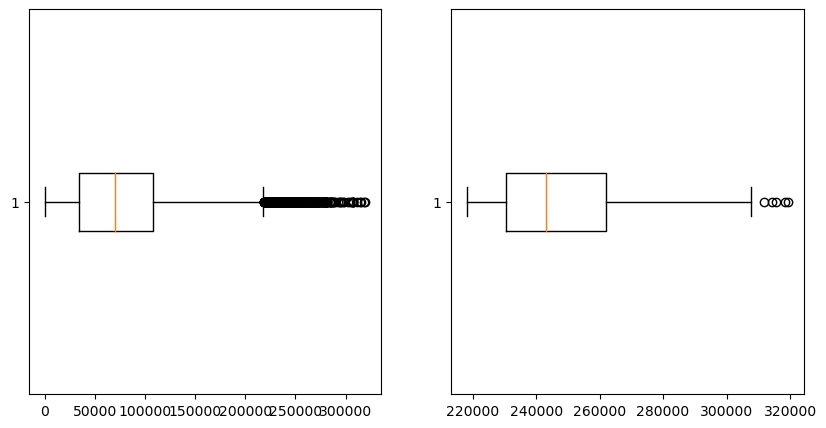

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(visa_df['prevailing_wage'], vert=False )
plt.subplot(1,2,2)
plt.boxplot(out_lier['prevailing_wage'], vert=False )
plt.show()

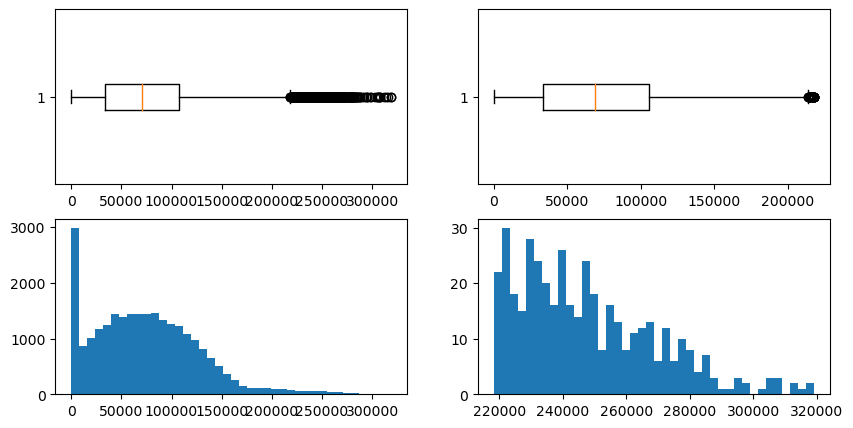

In [9]:
# will compare
# Total data 25480 vs non outlier data 25053
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.boxplot(visa_df['prevailing_wage'], vert=False )
plt.subplot(2,2,2)
plt.boxplot(non_out_lier['prevailing_wage'], vert=False )
plt.subplot(2,2,3)
plt.hist(visa_df['prevailing_wage'], bins=40)
plt.subplot(2,2,4)
plt.hist(out_lier['prevailing_wage'], bins=40)
plt.show()

**How to deal outlers**

- Drap the outliers based some percentage

    - if  you have very huge data
    
    - and  the ouliers percentage is <2 , then drop the outliers
    
    - drop the ouliers means . we are removing some rows all the colums
    
    - In the above examples total count=25480 outliers are = 427, 427*100/25480 = 1.6
    
    - After removing 427 observations we have 25053 observation (98% of data)
    
- Imput (fill) the outliers with medain value

    - We alreday know that outliers doesnt affect Median value
    
    - So if you dont want loss the data, and you want fill the outliers then use Median



- Imput (fill) with UB and LB values (capping)
    
    - Fill the outliers with UB value, which are having > UB
    
    - Fill the outliers with LB value which are <LB
    
    

In [ ]:
# To deal the outliers
# Drop: Not recommended >2%
# Meadian value 

In [15]:
out_lier

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [12]:
len(non_out_lier),len(out_lier)

(25053, 427)

In [18]:
visa_df['prevailing_wage'].medain()
out_lier['prevailing_wage']=visa_df['prevailing_wage'].median() .median()
out_lier['prevailing_wage']
updated_df = num_df[num_cols].fillna(num_df[num_cols].mean())
print(updated_df)

updated_df = non_out_lier['prevailing_wage'].fillna(out_lier['prevailing_wage']).medain()

# updated_df

AttributeError: 'Series' object has no attribute 'medain'

In [19]:
final_df=pd.merge(non_out_lier, out_lier, how='outer')
#final_df=pd.concat([])

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.5100,Year,Y,Denied
25476,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.7700,Year,N,Certified
25477,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.7400,Year,N,Certified
25478,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.4700,Year,N,Certified


In [22]:
i = 'prevailing_wage'
q1 = np.quantile(visa_df[i], 0.25)
q2 = np.quantile(visa_df[i], 0.50)
q3 = np.quantile(visa_df[i], 0.75)
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr
con1 = visa_df[i]>ub
con2 = visa_df[i]<lb 
con11 = visa_df[i]<ub
con22 = visa_df[i]>lb 
out_lier = visa_df[con1|con2]
non_out_lier = visa_df[con11&con22]

##################
#visa_df['prevailing_wage'].medain()
#out_lier['prevailing_wage']=visa_df['prevailing_wage'].medain()
modified_data = out_lier

#################
final_df=pd.merge(non_out_lier, out_lier, how='outer')
final_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.5100,Year,Y,Denied
25476,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.7700,Year,N,Certified
25477,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.7400,Year,N,Certified
25478,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.4700,Year,N,Certified


In [ ]:
**np.where(condition,true)

In [ ]:
con = visa_df['prevailing_wage']>out_lier
np.where(con, visa_df['prevailing_wage'])

70307.93


{'whiskers': [<matplotlib.lines.Line2D at 0x251cf9a5a90>,
 'caps': [<matplotlib.lines.Line2D at 0x251cfabdad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x251cf9a5410>],
 'medians': [<matplotlib.lines.Line2D at 0x251cfa53010>],
 'fliers': [<matplotlib.lines.Line2D at 0x251ce6b6650>],
 'means': []}

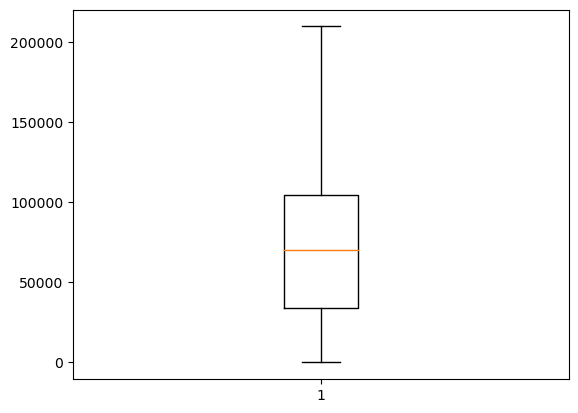

In [26]:
i = 'prevailing_wage'
q1 = np.quantile(visa_df[i], 0.25)
q2 = np.quantile(visa_df[i], 0.50)
q3 = np.quantile(visa_df[i], 0.75)
iqr = q3-q1
ub = q3+1.5*iqr
lb = q1-1.5*iqr
con1 = visa_df[i]>ub
con2 = visa_df[i]<lb 
con = con1|con2
median = visa_df['prevailing_wage'].median()
print(median)
visa_df['prevailing_wage'] =np.where(con, median,visa_df['prevailing_wage'])
visa_df['prevailing_wage']
plt.boxplot(visa_df['prevailing_wage'])